In [7]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("Datos/pokemon2.csv", nrows = 100000)

In [8]:
# Normalizamos los tipos, generando una columna por cada uno de ellos, ya que no importa el orden del tipo
#que seas
types1 = pd.get_dummies(df["Type 1"])
types2 = pd.get_dummies(df["Type 2"])
# Unimos las columnas de tipo1 y tipo2
types = types1 | types2
#Juntamos el df de los pokemons y los nuevos tipos
df_clean = pd.merge(df, types, left_index=True, right_index=True)
#Limpieza de pokemons con campos vacios
df_clean.dropna(inplace=True)
# Eliminamos las columnas antiguas de los tipos
df_clean.drop(["Type 1", "Type 2"], axis = 1,inplace= True)
df_clean


,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,45,49,49,65,65,45,1,False,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,1,False,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,1,False,...,0,1,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,80,100,123,122,120,80,1,False,...,0,1,0,0,0,1,0,0,0,0
6,7,Charizard,78,84,78,109,85,100,1,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,True,...,0,0,0,0,0,0,0,1,0,0
796,797,Mega Diancie,50,160,110,160,110,110,6,True,...,0,0,0,0,0,0,0,1,0,0
797,798,Hoopa Confined,80,110,60,150,130,70,6,True,...,1,0,0,0,0,0,1,0,0,0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,True,...,0,0,0,0,0,0,1,0,0,0


In [9]:
#REGRESION LINEAL
# Mezclamos los datos
df_rl = df_clean.sample(frac = 1)
# Observaremos la correlacion entre ambas variables
col1, col2 = ["Defense", "Sp. Def"]

df_rl.dropna(subset=[col1, col2], inplace = True)
Y = df_rl[col1]
X = df_rl[[col2]]

In [10]:
# A continuación ajustamos el modelo.
regr = linear_model.LinearRegression()
# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, Y)
# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes 
# (en este caso sólo hay una).
print("Coeficientes: ", regr.coef_)

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [0.61605927]
R cuadrado:  0.279085801189469


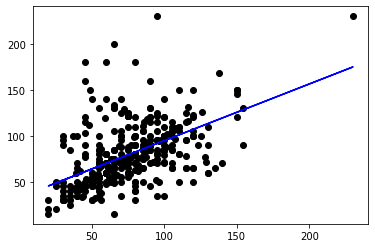

In [11]:
# Mostramos los resultados de forma gráfica, junto con la recta de regresión.
plt.scatter(X, Y, color = "black")
plt.plot(X, Y_pred, color = "blue")
plt.show()